# Case Study: TELCO CHURN 

## Problem Statement
The objective is to predict churn of a telecom company.<br>
The model should be able to identify, which user is going to churn in the next time period.

### Method of Analysis:
1.Convertion of data set from text file to csv is done<br>
2.Understanding the subject and data set provided by some commands like .shape, .head, and .columns<br>
3.Cleaning the data that involves finding the missing values and filling them with attribute mean or most probable value<br>
4.Redundant has been removed.<br>
5.Relationship analysis is done using scatter plot to find if there is any trend followed by the target value on basis of predictors provided.<br>
6.Finding the relations between predictors and target value.<br>
7.Concluding the problem.<br>

### Data Preprocessing & Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

data=pd.read_csv("Downloads/telco.csv")
data.shape

(1000, 42)

In [6]:
data.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
0,2,13,44,1,9,64,4,5,0,0,...,0,0,1.308333,NaN,NaN,2.014903,NaN,4.158883,1,1
1,3,11,33,1,7,136,5,5,0,0,...,1,0,1.481605,3.032546,NaN,2.724580,3.575151,4.912655,4,1
2,3,68,52,1,24,116,1,29,0,1,...,1,0,2.898671,2.890372,NaN,3.409496,NaN,4.753590,3,0
3,2,33,33,0,12,33,2,0,0,1,...,0,0,2.246015,NaN,NaN,NaN,NaN,3.496508,1,1
4,2,23,30,1,9,30,1,2,0,0,...,1,0,1.840550,NaN,NaN,NaN,NaN,3.401197,3,0
5,2,41,39,0,17,78,2,16,0,1,...,0,0,2.468100,2.957511,NaN,2.602690,NaN,4.356709,3,0
6,3,45,22,1,2,19,2,4,0,1,...,0,1,2.388763,NaN,NaN,2.169054,NaN,2.944439,2,1
7,2,38,35,0,5,76,2,10,0,0,...,1,1,1.800058,3.806662,3.914021,3.146305,4.172848,4.330733,4,0
8,3,45,59,1,7,166,4,31,0,0,...,1,0,2.277267,3.349904,NaN,2.484907,NaN,5.111988,3,0
9,1,68,41,1,21,72,1,22,0,0,...,0,0,3.184284,NaN,NaN,2.803360,NaN,4.276666,2,0


In [7]:
data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'longten', 'tollten', 'equipten', 'cardten', 'wireten', 'multline',
       'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer',
       'ebill', 'loglong', 'logtoll', 'logequi', 'logcard', 'logwire', 'lninc',
       'custcat', 'churn'],
      dtype='object')

In [11]:
data.nunique(axis=0)

region        3
tenure       72
age          60
marital       2
address      50
income      218
ed            5
employ       46
retire        2
gender        2
reside        8
tollfree      2
equip         2
callcard      2
wireless      2
longmon     425
tollmon     162
equipmon    310
cardmon     176
wiremon     263
longten     960
tollten     473
equipten    386
cardten     338
wireten     297
multline      2
voice         2
pager         2
internet      2
callid        2
callwait      2
forward       2
confer        2
ebill         2
loglong     425
logtoll     161
logequi     309
logcard     175
logwire     262
lninc       218
custcat       4
churn         2
dtype: int64

In [12]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,475.000000,386.000000,678.000000,296.000000,1000.000000,1000.000000,1000.000000
mean,2.022000,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,...,0.502000,0.371000,2.182110,3.239705,3.568092,2.854209,3.598296,3.957203,2.487000,0.274000
std,0.816200,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,...,0.500246,0.483314,0.734552,0.413813,0.277556,0.557286,0.367286,0.803754,1.120306,0.446232
min,1.000000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.105361,1.749200,2.734368,1.011601,2.701361,2.197225,1.000000,0.000000
25%,1.000000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,1.648659,2.970414,3.367727,2.463853,3.333543,3.367296,1.000000,0.000000
50%,2.000000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,...,1.000000,0.000000,2.142999,3.208825,3.572344,2.847812,3.594569,3.850148,3.000000,0.000000
75%,3.000000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,...,1.000000,1.000000,2.668094,3.488903,3.757414,3.208825,3.861780,4.418841,3.000000,1.000000
max,3.000000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,...,1.000000,1.000000,4.604670,5.153292,4.352855,4.693639,4.718052,7.419381,4.000000,1.000000


In [15]:
data['churn'].unique()

array([1, 0], dtype=int64)

###### Cleaning the data

In [18]:
data.isnull().sum()

region        0
tenure        0
age           0
marital       0
address       0
income        0
ed            0
employ        0
retire        0
gender        0
reside        0
tollfree      0
equip         0
callcard      0
wireless      0
longmon       0
tollmon       0
equipmon      0
cardmon       0
wiremon       0
longten       0
tollten       0
equipten      0
cardten       0
wireten       0
multline      0
voice         0
pager         0
internet      0
callid        0
callwait      0
forward       0
confer        0
ebill         0
loglong       0
logtoll     525
logequi     614
logcard     322
logwire     704
lninc         0
custcat       0
churn         0
dtype: int64

In [3]:
c=["logtoll","logequi","logcard","logwire"]
values={}
for v in c:
   m1=data[v].mean()
   values[v]=m1
print(values)

{'logtoll': 3.2397054694736847, 'logequi': 3.5680917227979276, 'logcard': 2.854208737463127, 'logwire': 3.598296060810811}


In [4]:
data=data.fillna(value=values)

In [5]:
data_c=data.drop(['retire', 'reside', 'ebill', 'confer', 'callwait'], axis=1)

###### Relationship Analysis

In [10]:
corelation = data_c.corr()

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


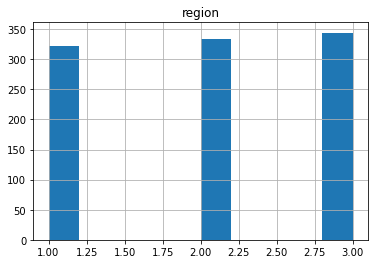

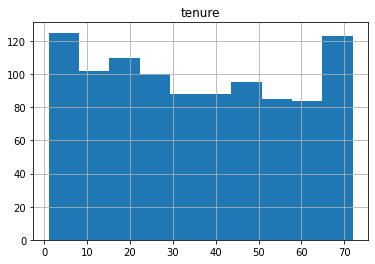

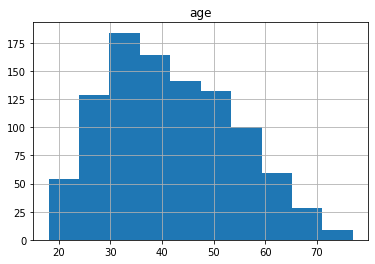

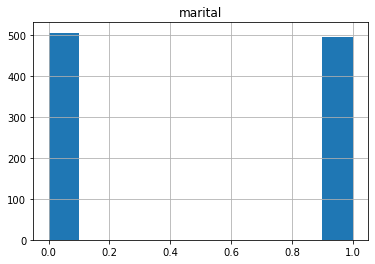

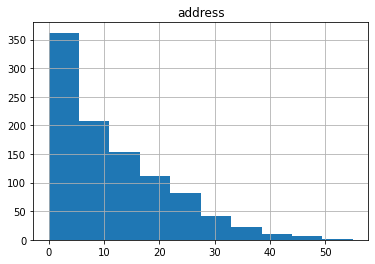

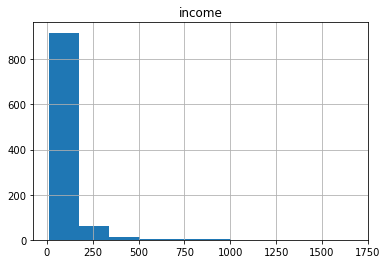

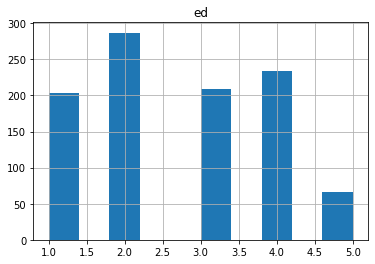

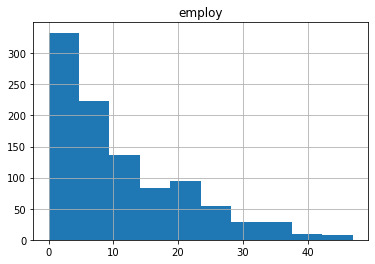

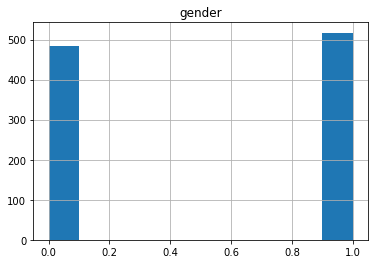

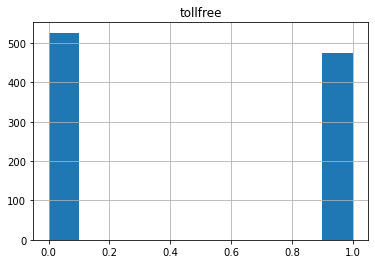

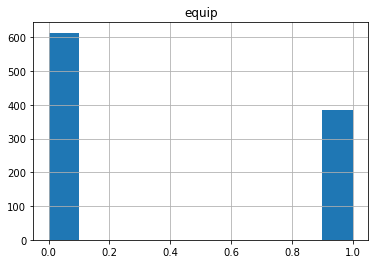

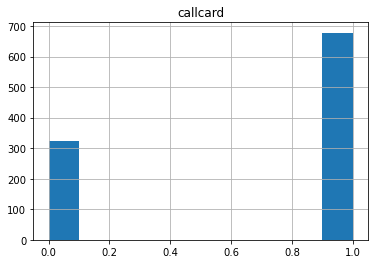

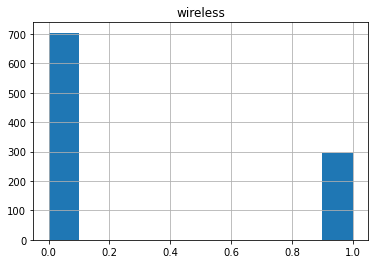

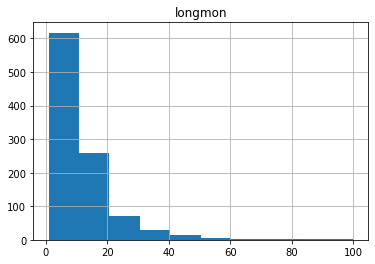

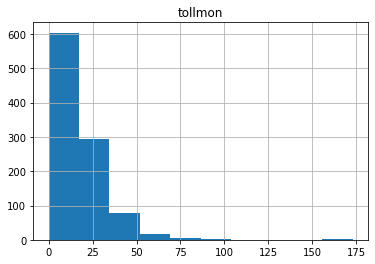

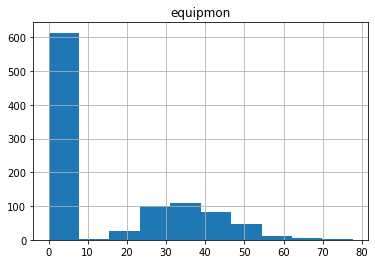

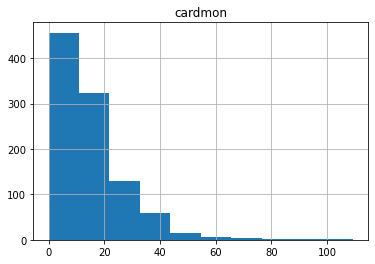

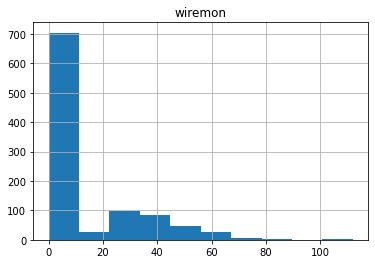

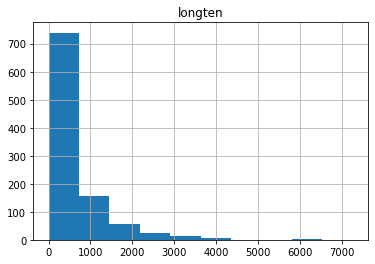

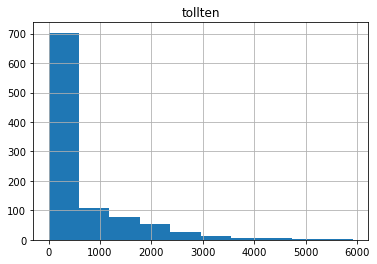

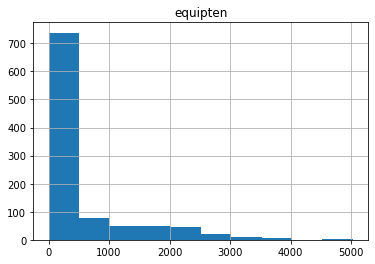

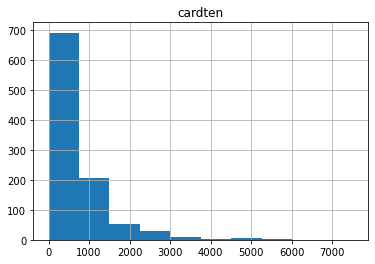

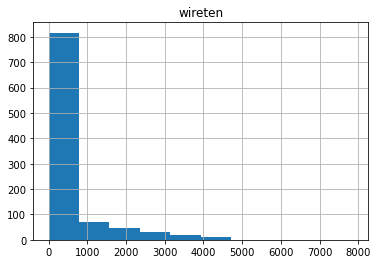

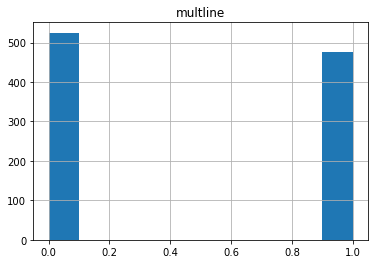

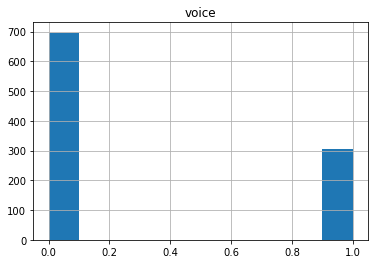

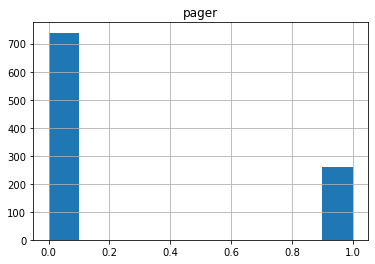

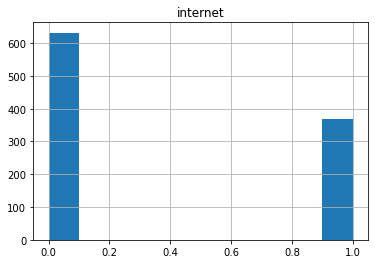

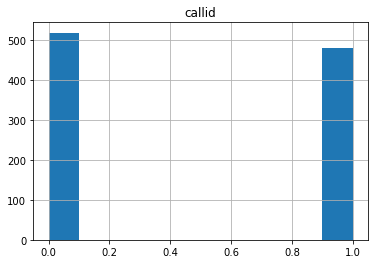

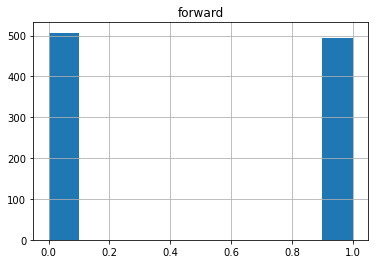

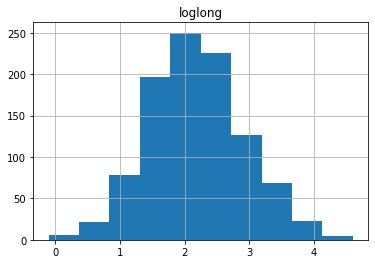

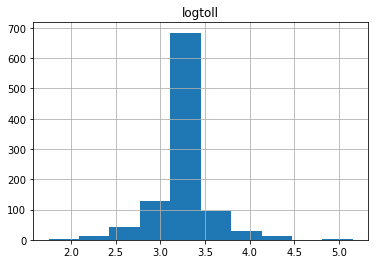

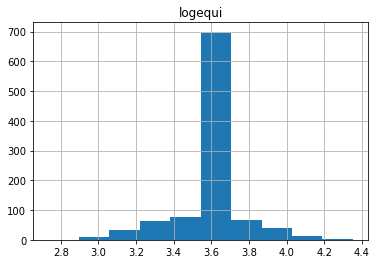

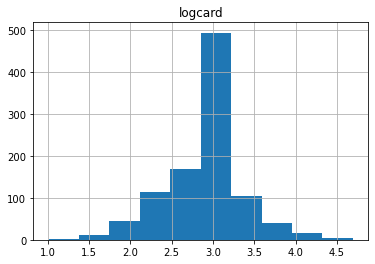

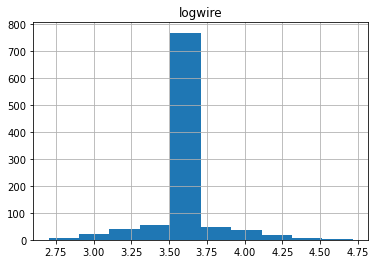

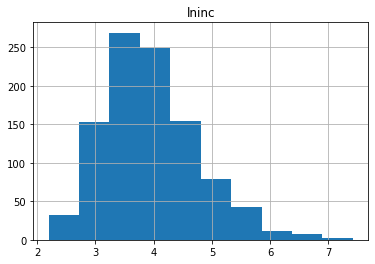

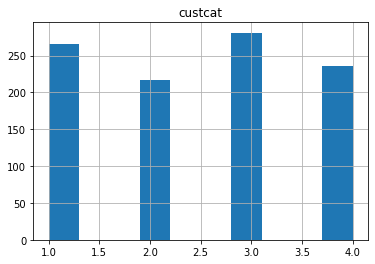

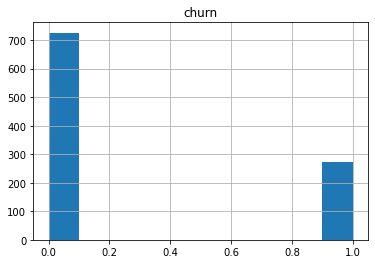

In [11]:
from matplotlib.ticker import StrMethodFormatter
for a in data_c.columns:
   data_c.hist(column=a)

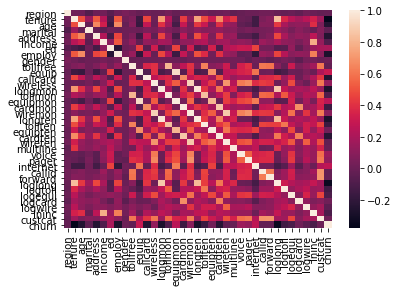

In [13]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns)

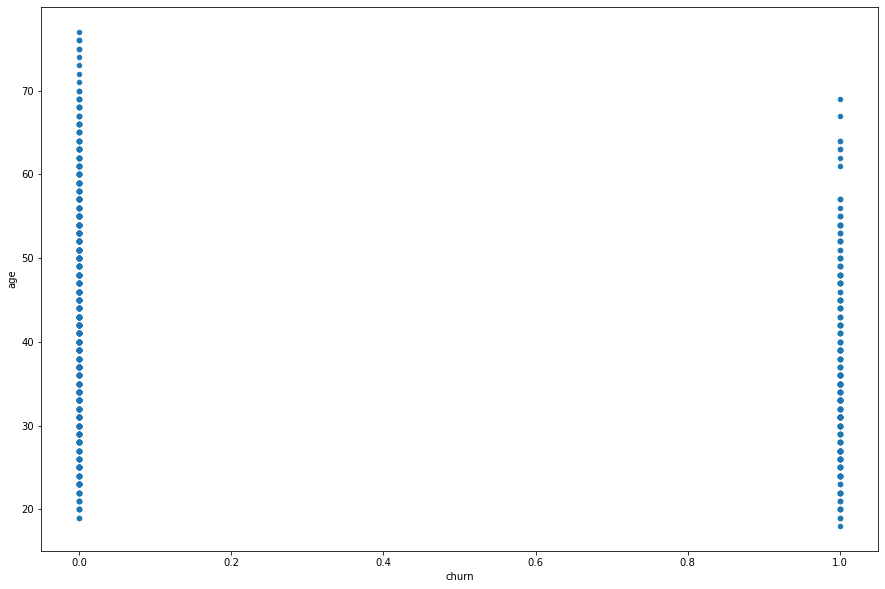

In [8]:
data_c.plot( x='churn', y='age', kind='scatter', figsize=(15,10))

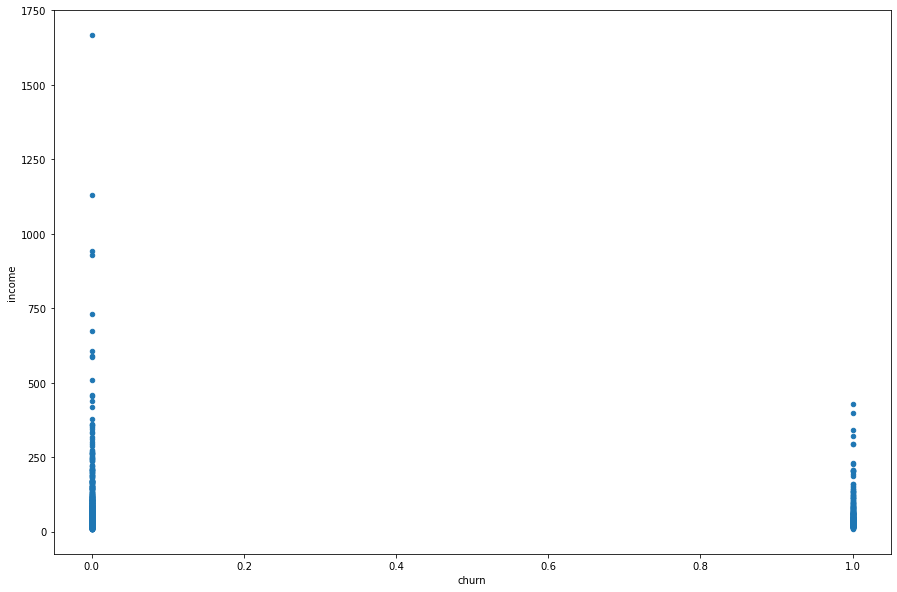

In [7]:
data.plot( x='churn', y='income', kind='scatter', figsize=(15,10))

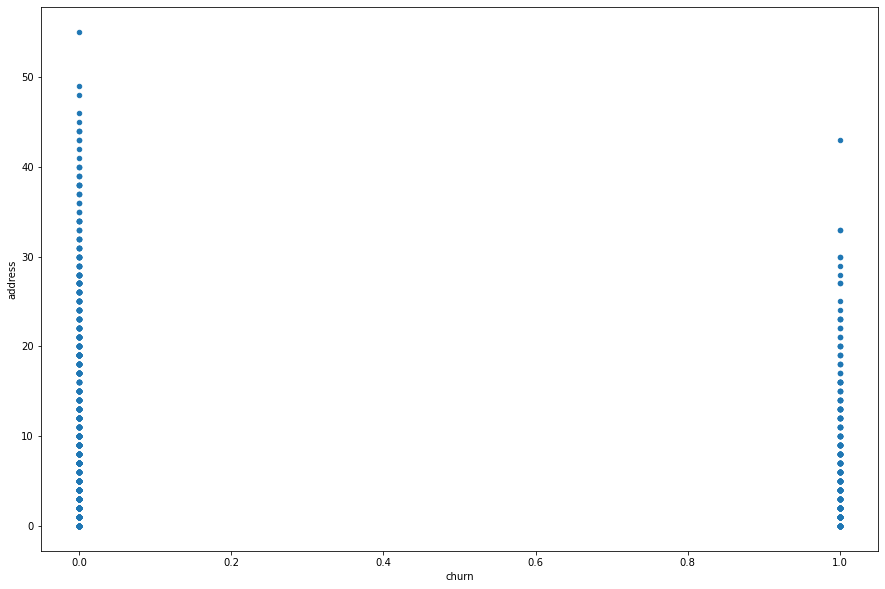

In [15]:
data.plot( x='churn', y='address', kind='scatter', figsize=(15,10))

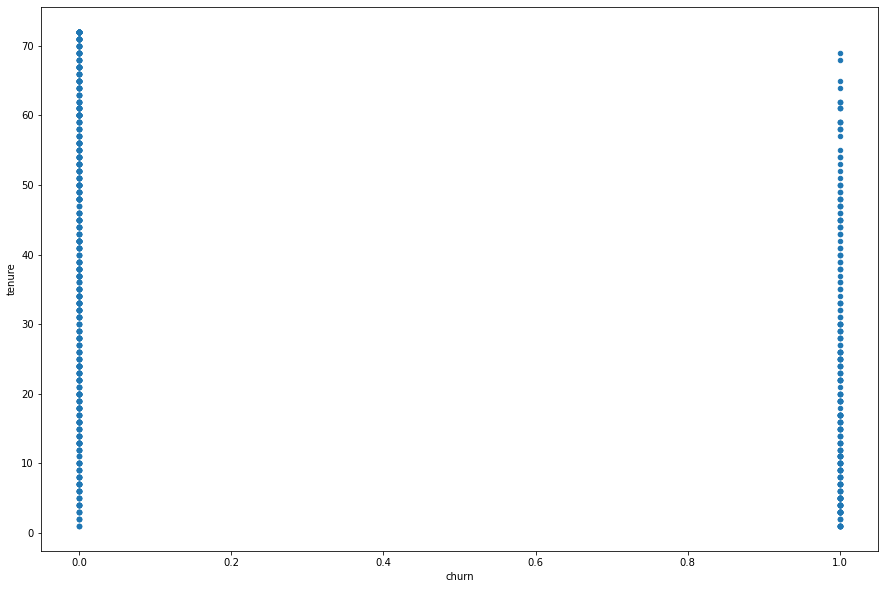

In [14]:
data.plot( x='churn', y='tenure', kind='scatter', figsize=(15,10))

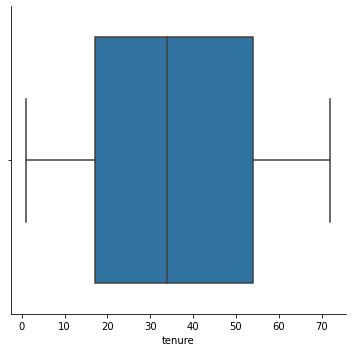

In [17]:
sns.catplot(x='tenure', kind='box', data=data_c)

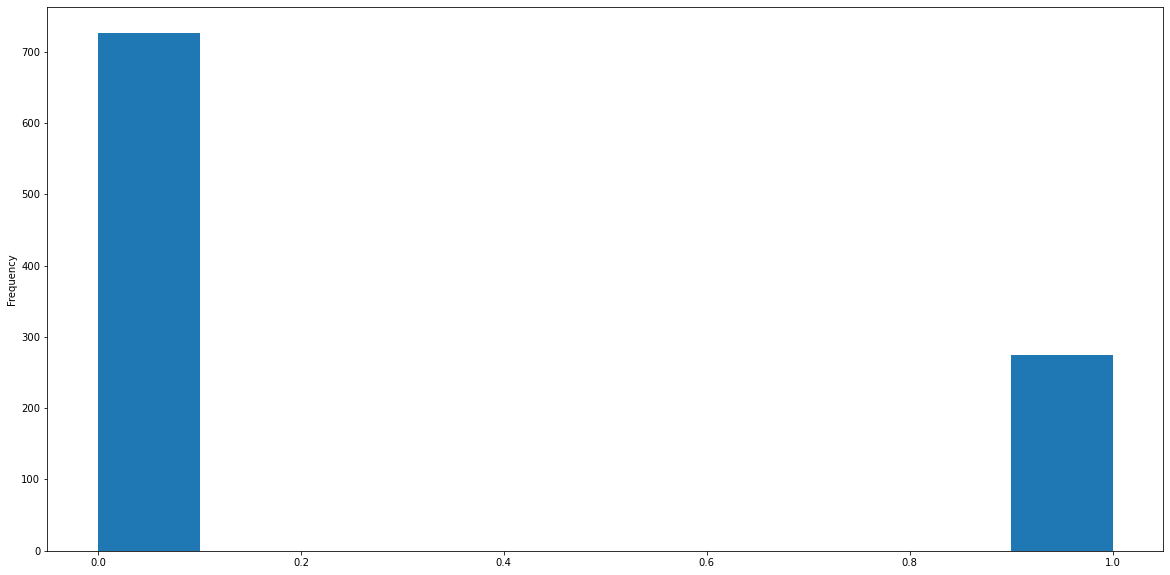

In [19]:
data_c['churn'].plot(kind='hist', figsize=(20,10));

## Findings:
1.It is observed that users between the income range 0 and 280 are likely to churn compared to the income range 281 and 1750.<br>
2.User's with addresses other than 60 and above 70 are likely to churn alot.

## Limitations of the report:
1.Heatmap understanding.<br>
2.Relation between target values and predictors using scatter plot. <br>
3.Clear understanding of variables that could be impacting churn.

